In [1]:
from data_transform_methods import DataTransform
from data_visualisation_methods import Plotter
from dataframe_info_methods import DataFrameInfo
from dataframe_transformation_methods import DataFrameTransform
from db_utils import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


info_methods = DataFrameInfo

loan_analysis_df = read_csv("loan_payments_nulls_removed.csv")
info_methods.df_info(loan_analysis_df)
loan_analysis_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54100 entries, 0 to 54099
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          54100 non-null  int64  
 1   member_id                   54100 non-null  int64  
 2   loan_amount                 54100 non-null  int64  
 3   funded_amount_inv           54100 non-null  float64
 4   term                        54100 non-null  float64
 5   int_rate                    54100 non-null  float64
 6   instalment                  54100 non-null  float64
 7   grade                       54100 non-null  object 
 8   sub_grade                   54100 non-null  object 
 9   employment_length           54100 non-null  object 
 10  home_ownership              54100 non-null  object 
 11  annual_inc                  54100 non-null  float64
 12  verification_status         54100 non-null  object 
 13  issue_date                  541

,id,member_id,loan_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,36.0,7.49,248.82,A,A4,5 years,...,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,36.0,6.99,407.52,A,A3,9 years,...,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,36.0,7.49,497.63,A,A4,8 years,...,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,36.0,14.31,514.93,C,C4,1 year,...,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,36.0,6.03,456.54,A,A1,10+ years,...,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,36.0,11.44,83.20,B,B4,< 1 year,...,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,36.0,21.99,254.89,E,E5,10+ years,...,288.53,0.0,0.0,0.0,2021-03-01,6724.95,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,26500,26200.0,60.0,19.99,701.95,E,E3,< 1 year,...,2984.92,0.0,0.0,0.0,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,60.0,12.99,227.48,C,C2,< 1 year,...,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,10000,10000.0,36.0,8.19,314.25,A,A5,10+ years,...,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,0.0,1,INDIVIDUAL


#### Current State of the Loans

Summarise what percentage of the loans have been currently recovered compared to the total amount to be paid over the loans term including interest.


In [2]:
# set the display to show all columns and rows and avoid scientific notation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.0f}'.format

# calculate the total payments for each loan
def calculate_total_payments(loan):
    return loan['term'] * loan['instalment']
loan_analysis_df['total_owed_inc_int'] = loan_analysis_df.apply(calculate_total_payments, axis=1)

# calculate the percentage of loans that have been recovered.
total_for_all_loans = loan_analysis_df['total_owed_inc_int'].sum()
total_of_loans_recovered = loan_analysis_df['total_payment'].sum()
percentage_of_loans_recovered = 100 * total_of_loans_recovered / total_for_all_loans
print(f'Total amount owed for all loans, inc interest: {'{:0,.0f}'.format(total_for_all_loans)}')
print(f'Total amount recovered to date: {'{:0,.0f}'.format(total_of_loans_recovered)}')
print(f'Percentage of loan amounts recovered to date: {round(percentage_of_loans_recovered, 2)}%')

Total amount owed for all loans, inc interest: 939,746,418
Total amount recovered to date: 654,573,342
Percentage of loan amounts recovered to date: 69.65%


Additionally calculate how much will be paid back in 6 months time with interest. Visualise your results on an appropriate graph.


Calcaulte the total outstanding for the loans with a current status.
 
Then calculate the amount owed in the next 6 months. The function also takes into account any loans that will be paid off in that time.

In [3]:
# calculate the total oustanding for all loans. This will include loans that have been paid off, so caution should be applied when look at the 'out_total_ column in detail.
def cal_total_outstanding(row):
    return row['total_owed_inc_int'] - row['total_payment']

loan_analysis_df['out_total'] = loan_analysis_df.apply(cal_total_outstanding, axis=1)

# calculates amount owed in 6 months and if loan paid off break out of the loop.
def calculate_owed_in_6_months(row):
    running_out_total = row['out_total']
    out_next_6_months = 0
    i = 1
    while i <= 6:
        out_next_6_months = out_next_6_months + row['instalment']
        running_out_total = running_out_total - row['instalment']
        if running_out_total <= 0:
            break 
        i +=1
    return out_next_6_months

# apply the calculation to the current loans
current_mask = loan_analysis_df['loan_status'].str.contains('Current')
loan_analysis_df['out_next_6_months'] = loan_analysis_df[current_mask].apply(calculate_owed_in_6_months, axis=1)

# total up the amount due to be paid back in the next 6 months.
amount_due_6_months = loan_analysis_df['out_next_6_months'].sum()
print(f'Amount due from recovered loans in the next 6 months: {'{:0,.0f}'.format(amount_due_6_months)}')



Amount due from recovered loans in the next 6 months: 50,743,964


visualise the data

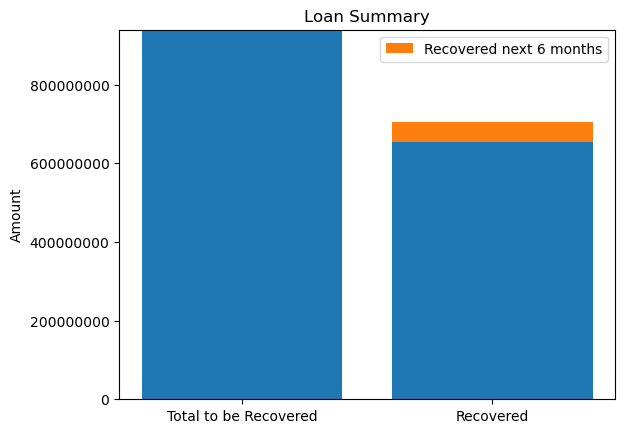

In [4]:
# Data
categories = ['Total to be Recovered', 'Recovered']
data1 = [total_for_all_loans, total_of_loans_recovered]  # First data point
data2 = [0, amount_due_6_months]    # Second data point

# Plot
fig, ax = plt.subplots()

# Create the first set of bars (bottom bars)
ax.bar(categories, data1)

# Create the second set of bars (stacked on top)
ax.bar(categories, data2, bottom=data1, label='Recovered next 6 months')

# Add labels and title
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Amount')
ax.set_title('Loan Summary')
ax.legend()

plt.show()


2: Calculating loss - 
Calculate the percentage of charged off loans and the total amount that was paid towards these loans before being charged off.

Includes loans with status 'Charged Off' and 'Does not meet the credit policy. Status:Charged Off'

In [5]:
# Using a logical mask to filter the charged off loans.
total_num_of_loans = len(loan_analysis_df)
charged_off_df = loan_analysis_df[loan_analysis_df['loan_status'].str.contains('Charged Off')].reset_index()
num_charged_off = len(charged_off_df)
percentage_charged_off = 100 * num_charged_off / total_num_of_loans
print(f'The number of charged off loans: {num_charged_off}')
print(f'The percentage of loans that were charged off: {round(percentage_charged_off, 2)}%')

# calculating the amount repaid before loans were charged off.
charged_off_repaid = charged_off_df['total_payment'].sum()
print(f'The amount already repaid for charged off loans: {'{:0,.0f}'.format(charged_off_repaid)}')


The number of charged off loans: 5853
The percentage of loans that were charged off: 10.82%
The amount already repaid for charged off loans: 39,092,575


Calculate the loss in revenue these loans would have generated for the company if they had finished their term. 

In [6]:
charged_off_out = charged_off_df['out_total'].sum()
print(f'The amount lost from charged off loans: {'{:0,.0f}'.format(charged_off_out)}')

The amount lost from charged off loans: 68,718,416


Visualise the loss projected over the remaining term of these loans.

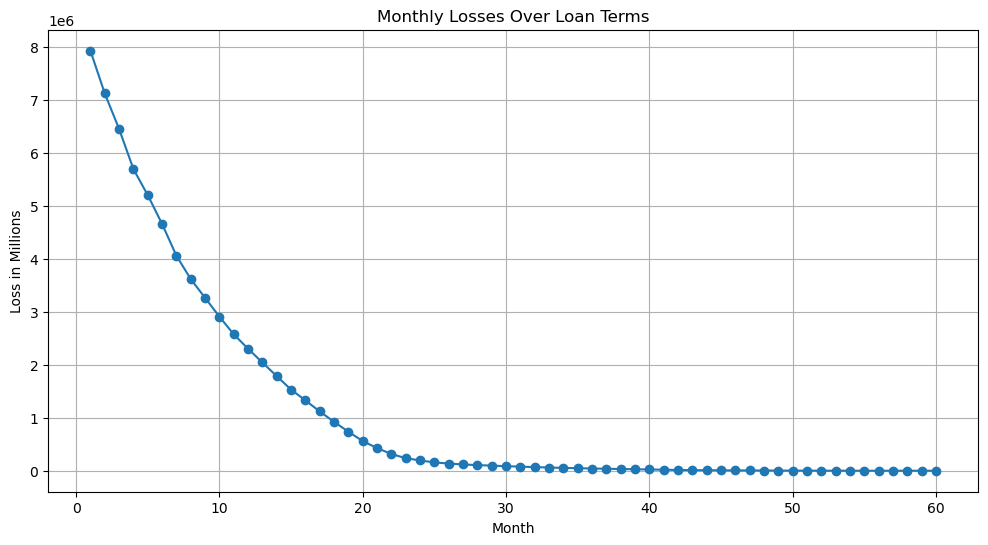

In [7]:
# Calculate monthly loss for each loan
charged_off_df['remaining_months'] = charged_off_df['term'] - (charged_off_df['out_total'] / charged_off_df['instalment'])
charged_off_df['remaining_months'] = charged_off_df['remaining_months'].astype(int)  # Ensure integer values
charged_off_df['monthly_loss'] = charged_off_df['out_total'] / charged_off_df['remaining_months']

# Expand losses across months
loss_data = []
for _, row in charged_off_df.iterrows():
    for month in range(1, row['remaining_months'] + 1):
        loss_data.append({
            'month': month,
            'loss': row['monthly_loss']
        })

# Create a new DataFrame
loan_loss_analysis_df = pd.DataFrame(loss_data)

# Aggregate total loss by month
monthly_loss = loan_loss_analysis_df.groupby('month')['loss'].sum().reset_index()

# Visualize the monthly loss
plt.figure(figsize=(12, 6))
plt.plot(monthly_loss['month'], monthly_loss['loss'], marker='o')
plt.title('Monthly Losses Over Loan Terms')
plt.xlabel('Month')
plt.ylabel('Loss in Millions')
plt.grid()
plt.show()


4 Possible loss

What percentage of loans are late on their payments?

Condisering all loans that have the status:
- Late (16-30 days)
- Late (31-120 days)

In [8]:
# Using groupby to group loan statuses. 
loan_status_group = loan_analysis_df.groupby('loan_status')['out_total'].agg([('out_total', 'sum'), ('num_loans', 'count')])
late_df_group = loan_status_group.loc[['Late (16-30 days)', 'Late (31-120 days)']]
num_of_late_loans = late_df_group['num_loans'].sum()
percentage_late = 100 * num_of_late_loans / total_num_of_loans
print(f'The percentage of loans that are late: {round(percentage_late, 2)}%')

The percentage of loans that are late: 1.27%


Calculate the total amount of customers in this bracket and how much loss the company would incur if their status was changed to Charged Off.

In [9]:
print(f'The number of customer\'s loans that are late: {num_of_late_loans}')
total_late_owed = late_df_group['out_total'].sum()
print(f'Risk to company by charging off late loans: {'{:0,.0f}'.format(total_late_owed)}')

The number of customer's loans that are late: 686
Risk to company by charging off late loans: 7,519,025


What is the projected loss of these loans if the customer were to finish the full loan term? I've chosen to display this as a monthly projection based on the monthly installments for those loans.

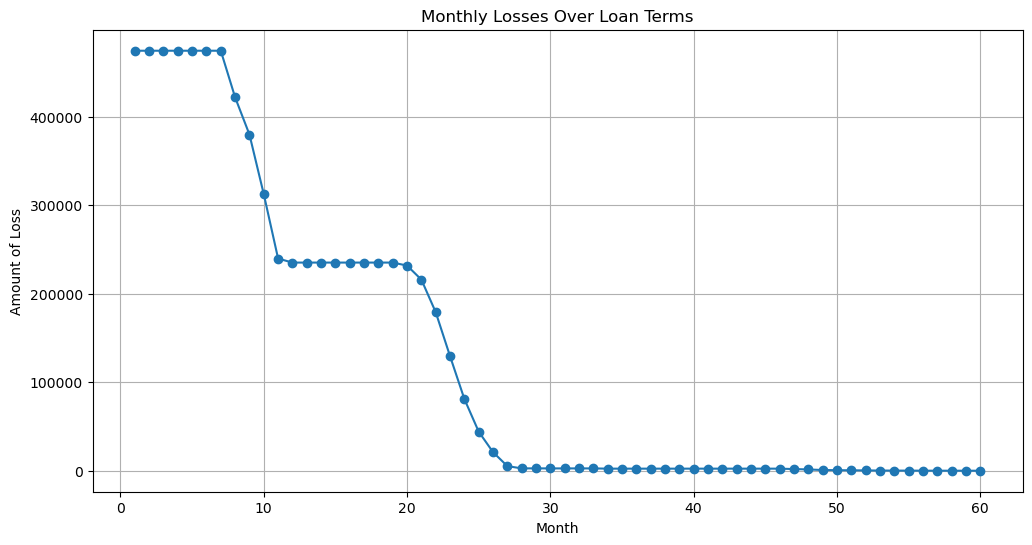

In [10]:
late_df_all = loan_analysis_df[loan_analysis_df['loan_status'].str.contains('Late')].reset_index()
# Step 1: Calculate monthly loss for each loan
late_df_all['remaining_months'] = late_df_all['term'] - (late_df_all['out_total'] / late_df_all['instalment'])
late_df_all['remaining_months'] = late_df_all['remaining_months'].astype(int)  # Ensure integer values
late_df_all['monthly_loss'] = late_df_all['out_total'] / late_df_all['remaining_months']

# Step 2: Expand losses across months
loss_data = []
for _, row in late_df_all.iterrows():
    for month in range(1, row['remaining_months'] + 1):
        loss_data.append({
            'month': month,
            'loss': row['monthly_loss']
        })

# Create a new DataFrame
late_loan_loss_df = pd.DataFrame(loss_data)

# Step 3: Aggregate total loss by month
monthly_loss = late_loan_loss_df.groupby('month')['loss'].sum().reset_index()

# Step 4: Visualize the monthly loss
plt.figure(figsize=(12, 6))
plt.plot(monthly_loss['month'], monthly_loss['loss'], marker='o')
plt.title('Monthly Losses Over Loan Terms')
plt.xlabel('Month')
plt.ylabel('Amount of Loss')
plt.grid()
plt.show()


If customers that are late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted and charged off on their loan represent?

In [11]:
loan_status_total_group = loan_analysis_df.groupby('loan_status')['total_owed_inc_int'].sum()
late_loans_df = loan_status_total_group.loc[['Late (16-30 days)', 'Late (31-120 days)']]
total_owed_late_loans = late_loans_df.sum()
percentage_total_late = 100 * total_owed_late_loans / total_for_all_loans
print(f'The percentage of total expected revenue that late loans represent: {round(percentage_total_late, 2)}%')

default_loans_df = loan_status_total_group.loc[['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']]
total_owed_default_loans = default_loans_df.sum()
percentage_total_default = 100 * total_owed_default_loans / total_for_all_loans
print(f'The percentage of total expected revenue that defaulted and charged off loans represent: {round(percentage_total_default, 2)}%')

The percentage of total expected revenue that late loans represent: 1.53%
The percentage of total expected revenue that defaulted and charged off loans represent: 11.58%


Task 5

Create new dataframes of subset of usesrs

In [12]:
loan_analysis_df.describe()

,id,member_id,loan_amount,funded_amount_inv,term,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,policy_code,total_owed_inc_int,out_total,out_next_6_months
count,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100,19267
mean,7631701,8666729,13345,12969,43,14,400,72223,16,0,1,11,24,2760,2759,12099,11814,9424,2583,1,92,11,3137,0,1,17371,5271,2634
std,9572469,10313588,8081,8094,11,4,239,51555,8,1,1,5,12,5159,5157,8388,8357,6956,2582,6,621,120,5328,0,0,11728,7541,1452
min,55521,74724,500,0,34,5,16,3300,0,0,0,1,1,0,0,34,0,0,6,0,0,0,0,0,1,564,-16032,69
25%,761492,960801,7000,6775,36,11,225,45000,10,0,0,7,16,0,0,5916,5689,4282,893,0,0,0,291,0,1,8589,352,1596
50%,7085866,8710748,12000,11325,36,14,347,61052,16,0,0,10,23,0,0,10131,9856,7672,1739,0,0,0,564,0,1,14378,2164,2313
75%,8865168,10527764,18075,18000,60,16,528,86000,21,0,1,13,31,3411,3410,16290,15999,12550,3328,0,0,0,3754,0,1,23508,6943,3472
max,38676116,41461848,35000,35000,389,26,1407,2039784,40,18,33,53,108,32400,32400,55758,55061,35000,23062,359,27750,7002,36115,4,1,219307,188053,8442


In [13]:
stopped_paying_status = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']
loan_mask = loan_analysis_df['loan_status'].isin(stopped_paying_status)
customers_stopped_paying_df = loan_analysis_df[loan_mask].reset_index()

Dataframe for fully paid to compare to

In [14]:
fully_paid_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
loan_mask_2 = loan_analysis_df['loan_status'].isin(fully_paid_status)
fully_paid_df = loan_analysis_df[loan_mask_2].reset_index()

In [15]:
customers_stopped_paying_df.describe()
customers_stopped_paying_df['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

purpose
debt_consolidation    54.2%
credit_card           15.6%
other                  9.0%
small_business         5.7%
home_improvement       5.2%
major_purchase         2.9%
car                    1.6%
medical                1.5%
moving                 1.2%
wedding                0.8%
house                  0.7%
educational            0.7%
vacation               0.6%
renewable_energy       0.2%
Name: proportion, dtype: object

In [16]:
fully_paid_df.describe()
fully_paid_df['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

purpose
debt_consolidation    51.9%
credit_card           18.1%
other                  7.8%
home_improvement       6.6%
major_purchase         4.1%
small_business         2.7%
car                    2.6%
wedding                1.6%
medical                1.4%
moving                 1.0%
house                  0.8%
vacation               0.7%
educational            0.6%
renewable_energy       0.2%
Name: proportion, dtype: object

In [17]:
loan_analysis_df['loan_status'].value_counts()

loan_status
Fully Paid                                             27011
Current                                                19267
Charged Off                                             5500
Does not meet the credit policy. Status:Fully Paid       966
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      353
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64

Using FUlly Paid as a baseline, first we compare different columns between Fully Paid and CHarged off to see if there are any indicators where the Charged off loans are at a higher risk. 


Create a class for loan comparison

In [ ]:
class LoanComparison:

    def __init__(self, df, category_col, column2, status1, status2):
        """
        Initialize the class with a DataFrame, category column, list of columns to analyse and two loan statuses to analyse.
        
        :param df: DataFrame containing the data
        :param category_col: The name of the column containing categories (default is 'Category')
        :param columns: List of column names (must be continuous variables) to plot
        :param status1: The first loan status to compare.
        :param status2: The second loan status to compare.
        """
        self.df = df
        self.category_col = category_col
        self.column2 = column2
        self.status1 = status1
        self.status2 = status2

    def loan_barplot(self, x_fontsize):
        self.comparison_df = self.df[self.df[self.category_col].isin([self.status1, self.status2])]

        # Step 1: Group and calculate proportions
        group_counts = self.comparison_df.groupby([self.category_col, self.column2]).size().reset_index(name='Count')
        loan_status_totals = group_counts.groupby(self.category_col)['Count'].transform('sum')
        group_counts['Proportion'] = group_counts['Count'] / loan_status_totals

        status_order = [self.status1, self.status2]

        # Step 2: Plot the data
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=group_counts, 
            x=self.column2, 
            y='Proportion', 
            hue=self.category_col, 
            hue_order=status_order, 
            palette='muted')

        # Step 3: Customize the plot
        plt.title(f'Comparison of {self.column2} between {self.status1} and {self.status2}', fontsize=16)
        plt.xlabel(f'{self.column2}', fontsize=14)
        plt.ylabel('proportion', fontsize=14)
        plt.legend(title=self.category_col, fontsize=12, title_fontsize=13)
        plt.tight_layout()
        plt.xticks(fontsize=x_fontsize)

        # Show the plot
        plt.show()




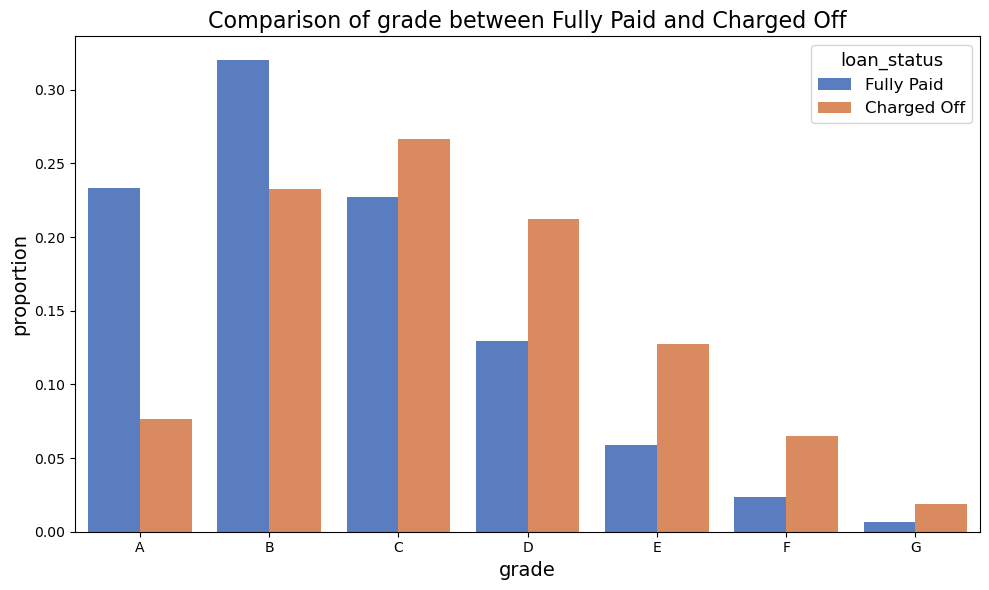

In [28]:
grading_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='grade', status1='Fully Paid', status2='Charged Off')
grading_comp.loan_barplot(10)
# pass the x-axis font size as an arguement 

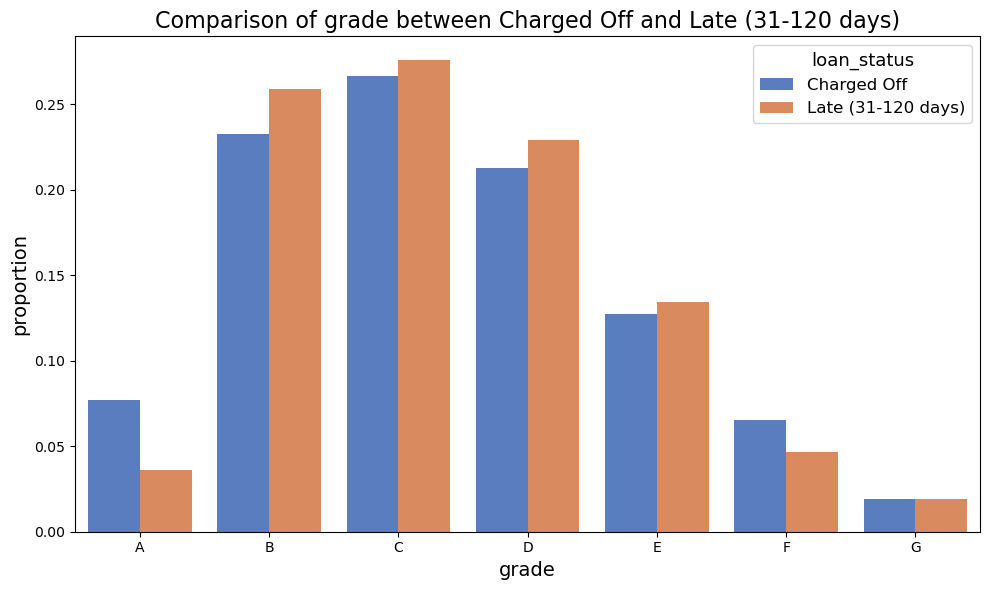

In [20]:
grading_comp_late = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='grade', status1='Charged Off', status2='Late (31-120 days)')
grading_comp_late.loan_barplot(10)

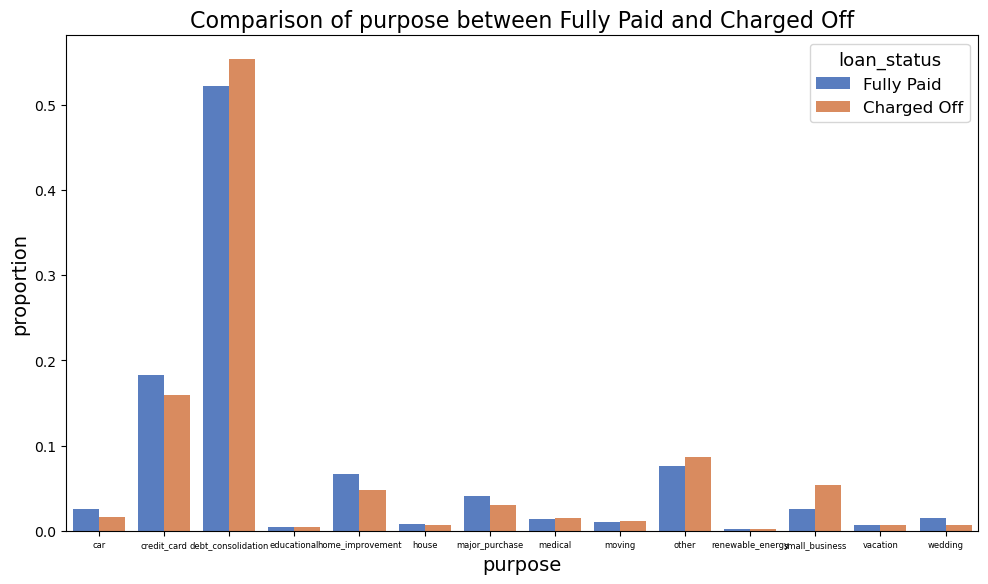

In [21]:
purpose_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='purpose', status1='Fully Paid', status2='Charged Off')
purpose_comp.loan_barplot(6)


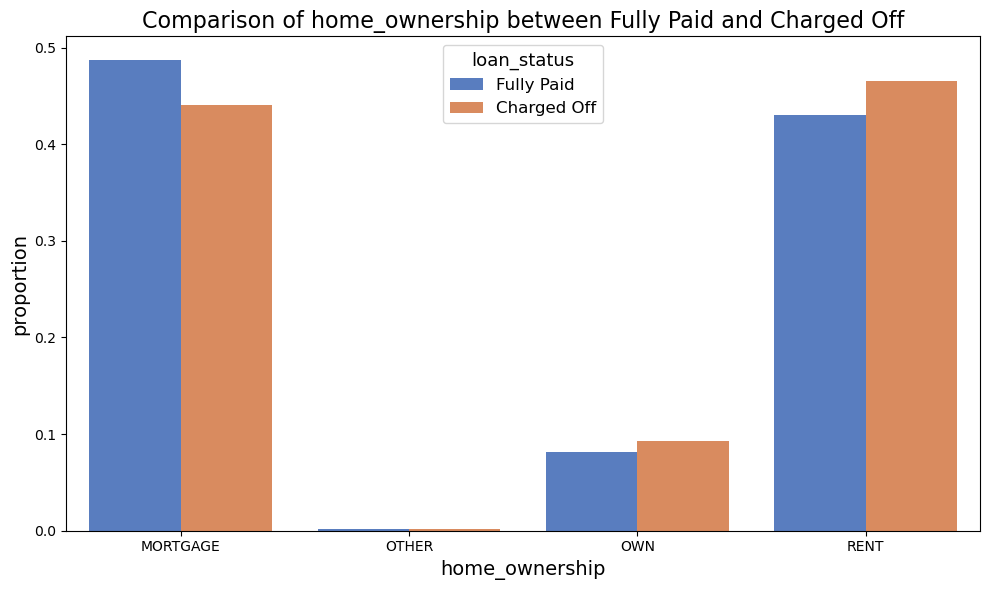

In [22]:
home_own_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='home_ownership', status1='Fully Paid', status2='Charged Off')
home_own_comp.loan_barplot(10)

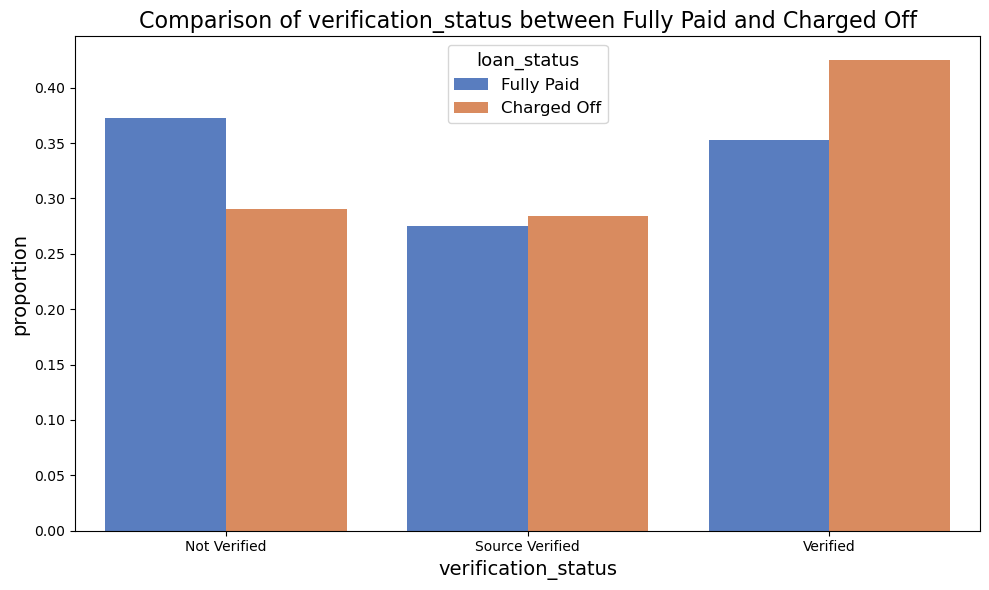

In [23]:
verification_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='verification_status', status1='Fully Paid', status2='Charged Off')
verification_comp.loan_barplot(10)

Compare some of the continuous data values. The values have been normalised to enable easier visulisation 

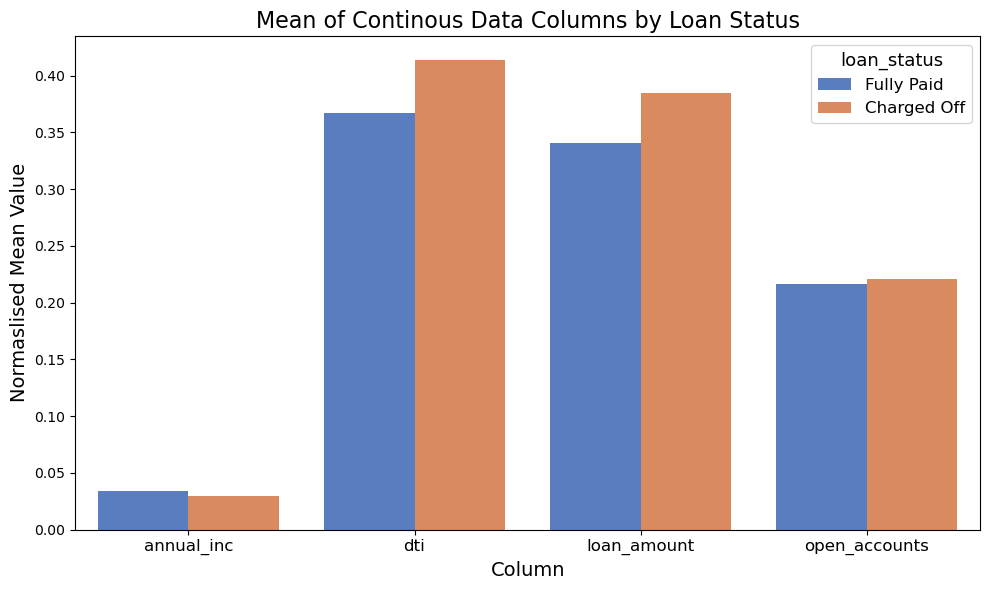

In [ ]:
class ContinousDataComp:

    def __init__(self, df, category_col, columns, status1, status2):
        """
        Initialize the class with a DataFrame, category column, list of columns to analyse and two loan statuses to analyse.
        
        :param df: DataFrame containing the data
        :param category_col: The name of the column containing categories (default is 'Category')
        :param columns: List of column names (must be continuous variables) to plot
        :param status1: The first loan status to compare.
        :param status2: The second loan status to compare.
        """
        self.df = df
        self.category_col = category_col
        self.columns = columns
        self.status1 = status1
        self.status2 = status2

    def filter_data(self):
        """
        Filter the data to include only the selected categories.
        """
        self.filter_df = self.df.loc[self.df[self.category_col].isin([self.status1, self.status2])].copy()

    def reshape_data(self):
        """
        Reshape the data into a 'long' format for plotting.
        """
        self.df_melted = self.filter_df.melt(id_vars=[self.category_col], 
                                        value_vars=self.columns,
                                        var_name='Column', 
                                        value_name='Value')

    def normalize_data(self):
        """
        Normalize the continuous columns using Min-Max normalization.
        """
        
        for column in self.columns:
                min_val = self.filter_df[column].min()
                max_val = self.filter_df[column].max()
                self.filter_df[column] = (self.filter_df[column] - min_val) / (max_val - min_val)

    def plot(self):
        
        """
        Plot the bar chart comparing the means of the specified columns by category.
        """
       
        # Step 1: Filter the data based on the selected categories
        self.filter_data()

        # Step 2: Normalize the data if required
        self.normalize_data()

        # Step 3: Reshape the data into long format
        self.reshape_data()

        # Step 4: Calculate the mean for each group and column
        mean_df = self.df_melted.groupby([self.category_col, 'Column']).mean().reset_index()

        # set the order of the loan status
        status_order = [self.status1, self.status2]

        # Step 5: Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=mean_df,
            x='Column',
            y='Value',
            hue=self.category_col,
            hue_order=status_order,
            palette='muted')

        # Step 5: Customize the plot
        plt.title('Mean of Continous Data Columns by Loan Status', fontsize=16)
        plt.xlabel('Column', fontsize=14)
        plt.ylabel('Normaslised Mean Value', fontsize=14)
        plt.xticks(fontsize=12)
        plt.legend(title=self.category_col, fontsize=12, title_fontsize=13)
        plt.tight_layout()

        # Show the plot
        plt.show()

loan_mean_comp = ContinousDataComp(df=loan_analysis_df, category_col='loan_status', columns=['loan_amount', 'annual_inc', 'dti', 'open_accounts'], status1='Fully Paid', status2='Charged Off')
loan_mean_comp.plot()